In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pathlib import Path
import scipy as stats

In [22]:
restaruantpath= Path("csv_folder/restaurant_data.csv")
restaruantfile=pd.read_csv(restaruantpath,encoding="UTF-8")
restaruantfile


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
1,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
2,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
3,40944945,Stage 42,Manhattan,422,WEST 42 STREET,10036.0,2125867610,American,09/24/2015,Establishment re-opened by DOHMH.,...,Cycle Inspection / Reopening Inspection,40.758823,-73.993607,104.0,3.0,11500.0,1087184.0,1.010518e+09,MN15,NaN
4,50041177,FIRSTLIVE STUDIO,Brooklyn,219,CENTRAL AVENUE,11221.0,9292109055,Other,09/24/2015,Violations were cited in the following area(s).,...,Administrative Miscellaneous / Initial Inspection,40.697359,-73.923881,304.0,37.0,42100.0,3074096.0,3.032550e+09,BK78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN
1423,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Smoke-Free Air Act / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN
1424,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN
1425,50061356,EL ROCHE LEBANON,Queens,2548,STEINWAY ST,11103.0,7182676222,Middle Eastern,12/28/2017,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.767548,-73.912025,401.0,22.0,14300.0,4010285.0,4.006540e+09,QN70,NaN


In [23]:
restaruantfile.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')

In [24]:
 # Define subset of columns to consider for duplicates
restaruantfile['CAMIS'].value_counts()

CAMIS
40398688    20
41087273    18
41493226    17
40716625    15
41611709    15
            ..
40600853     1
50017147     1
50019038     1
41688136     1
41611748     1
Name: count, Length: 405, dtype: int64

In [25]:
#Put columns to keep in a list
restaurants_to_keep=['BORO','DBA', 'ZIPCODE','CUISINE DESCRIPTION','INSPECTION DATE','GRADE']
restaruantfile=restaruantfile[restaurants_to_keep].copy()
#restaruantfile = restaruantfile.drop(columns=['BUILDING','STREET', 'PHONE', 'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA', 'RECORD DATE', 'GRADE DATE'])
restaruantfile.head()

,BORO,DBA,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE
0,Brooklyn,FIRSTLIVE STUDIO,11221.0,Other,09/24/2015,NaN
1,Brooklyn,FIRSTLIVE STUDIO,11221.0,Other,09/24/2015,NaN
2,Brooklyn,FIRSTLIVE STUDIO,11221.0,Other,09/24/2015,NaN
3,Manhattan,Stage 42,10036.0,American,09/24/2015,P
4,Brooklyn,FIRSTLIVE STUDIO,11221.0,Other,09/24/2015,NaN


In [26]:
#Drop restaurants that don't have a grade (i.e., NaN) from the dataframe
#query_df['grade'].unique()
clean_grade_df = restaruantfile.dropna(subset=['GRADE'])



In [27]:
#getting unique value lists which should be helpful later when making calls. this syntax can work for any column.
clean_grade_df['CUISINE DESCRIPTION'].unique().tolist()
clean_grade_df['BORO'].unique().tolist()

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

In [28]:
#the code worked but i think we will have to run the dates through that filter code to get it sorted. I am holdingoff until class to do this.
clean_grade_df.sort_values('INSPECTION DATE',ascending=False)
clean_grade_df.head()

,BORO,DBA,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE
3,Manhattan,Stage 42,10036.0,American,09/24/2015,P
5,Manhattan,Stage 42,10036.0,American,10/14/2015,A
6,Manhattan,Stage 42,10036.0,American,10/14/2015,A
8,Manhattan,AMERICAN AIRLINES THEATER,10036.0,American,11/19/2015,A
9,Manhattan,AMERICAN AIRLINES THEATER,10036.0,American,11/19/2015,A


In [29]:
#Restrict dataset to just September 2010 to September 2017
clean_grade_df['INSPECTION DATE'] = pd.to_datetime(clean_grade_df['INSPECTION DATE']).dt.date
clean_grade_df['Date']=clean_grade_df['INSPECTION DATE']
clean_grade_df['ZIPCODE'].fillna(-1,inplace=True)
clean_grade_df['ZIPCODE'] = clean_grade_df['ZIPCODE'].astype(int)
clean_grade_df

C:\Users\Troy Flood\AppData\Local\Temp\ipykernel_17348\1024405262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_grade_df['INSPECTION DATE'] = pd.to_datetime(clean_grade_df['INSPECTION DATE']).dt.date
C:\Users\Troy Flood\AppData\Local\Temp\ipykernel_17348\1024405262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_grade_df['Date']=clean_grade_df['INSPECTION DATE']
C:\Users\Troy Flood\AppData\Local\Temp\ipykernel_17348\1024405262.py:4: FutureWarning: A value is trying to be set on a copy 

,BORO,DBA,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,Date
3,Manhattan,Stage 42,10036,American,2015-09-24,P,2015-09-24
5,Manhattan,Stage 42,10036,American,2015-10-14,A,2015-10-14
6,Manhattan,Stage 42,10036,American,2015-10-14,A,2015-10-14
8,Manhattan,AMERICAN AIRLINES THEATER,10036,American,2015-11-19,A,2015-11-19
9,Manhattan,AMERICAN AIRLINES THEATER,10036,American,2015-11-19,A,2015-11-19
...,...,...,...,...,...,...,...
1393,Queens,CB CHARISMA BALLROOM,11367,Other,2017-12-18,A,2017-12-18
1396,Queens,CB CHARISMA BALLROOM,11367,Other,2017-12-18,A,2017-12-18
1403,Queens,UNDERGROUND LOUNGE,11419,Caribbean,2017-12-21,A,2017-12-21
1409,Queens,UNDERGROUND LOUNGE,11419,Caribbean,2017-12-21,A,2017-12-21


In [30]:

italian_df=clean_grade_df.loc[clean_grade_df['CUISINE DESCRIPTION']=='Italian']
italian_df.loc[italian_df['GRADE']=='C']

,BORO,DBA,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,Date
1278,Manhattan,PICCOLO CAFE,10023,Italian,2017-10-13,C,2017-10-13
1279,Manhattan,PICCOLO CAFE,10023,Italian,2017-10-13,C,2017-10-13
1280,Manhattan,PICCOLO CAFE,10023,Italian,2017-10-13,C,2017-10-13
1281,Manhattan,PICCOLO CAFE,10023,Italian,2017-10-13,C,2017-10-13
1282,Manhattan,PICCOLO CAFE,10023,Italian,2017-10-13,C,2017-10-13
1283,Manhattan,PICCOLO CAFE,10023,Italian,2017-10-13,C,2017-10-13
1300,Bronx,DOMINICK'S BAR & RESTAURANT,10458,Italian,2017-10-23,C,2017-10-23
1301,Bronx,DOMINICK'S BAR & RESTAURANT,10458,Italian,2017-10-23,C,2017-10-23
1302,Bronx,DOMINICK'S BAR & RESTAURANT,10458,Italian,2017-10-23,C,2017-10-23
1303,Bronx,DOMINICK'S BAR & RESTAURANT,10458,Italian,2017-10-23,C,2017-10-23


In [31]:
# QUESTION 1: How many A, B, C restaurants were there in New York City from September 2010-September 2017?
gradecountscitywide=clean_grade_df
gradecountscitywide


,BORO,DBA,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,Date
3,Manhattan,Stage 42,10036,American,2015-09-24,P,2015-09-24
5,Manhattan,Stage 42,10036,American,2015-10-14,A,2015-10-14
6,Manhattan,Stage 42,10036,American,2015-10-14,A,2015-10-14
8,Manhattan,AMERICAN AIRLINES THEATER,10036,American,2015-11-19,A,2015-11-19
9,Manhattan,AMERICAN AIRLINES THEATER,10036,American,2015-11-19,A,2015-11-19
...,...,...,...,...,...,...,...
1393,Queens,CB CHARISMA BALLROOM,11367,Other,2017-12-18,A,2017-12-18
1396,Queens,CB CHARISMA BALLROOM,11367,Other,2017-12-18,A,2017-12-18
1403,Queens,UNDERGROUND LOUNGE,11419,Caribbean,2017-12-21,A,2017-12-21
1409,Queens,UNDERGROUND LOUNGE,11419,Caribbean,2017-12-21,A,2017-12-21


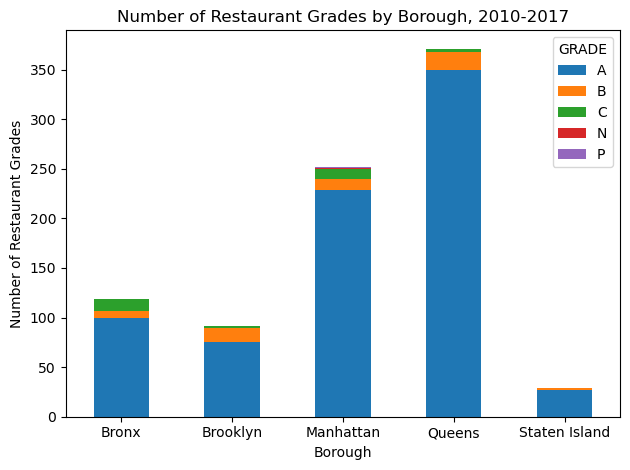

In [32]:
# QUESTION 3: Number of grades by Borough
gradecounts= clean_grade_df.groupby(['BORO', 'GRADE']).size().reset_index(name='count')

Boroughs = gradecounts['BORO']
counts = gradecounts['count']
grades = gradecounts['GRADE']

transposecounts = gradecounts.pivot(index='BORO', columns='GRADE', values='count').fillna(0)

transposecounts.plot(kind='bar', stacked=True)
plt.xlabel('Borough')
plt.ylabel('Number of Restaurant Grades')
plt.title('Number of Restaurant Grades by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [33]:
#Do certain Zip Codes have higher restaurant ratings?


In [34]:
print(clean_grade_df.columns)

Index(['BORO', 'DBA', 'ZIPCODE', 'CUISINE DESCRIPTION', 'INSPECTION DATE',
       'GRADE', 'Date'],
      dtype='object')


In [ ]:
# Extract unique cuisine descriptions
cuisinedescriptions = clean_grade_df['CUISINE DESCRIPTION'].unique()
cuisinedescriptions

array(['American', 'Other', 'Korean', 'Latin American', 'Frozen Desserts',
       'Hotdogs', 'Pizza', 'French', 'Bottled Beverages', 'Italian',
       'Tex-Mex', 'Japanese', 'Spanish', 'Coffee/Tea', 'Mediterranean',
       'Caribbean', 'Middle Eastern', 'German', 'Hamburgers',
       'Sandwiches/Salads/Mixed Buffet', 'Vegan', 'Bagels/Pretzels',
       'Jewish/Kosher', 'Filipino', 'Indian', 'Sandwiches', 'Seafood',
       'Chinese', 'Eastern European', 'Donuts', 'Soups/Salads/Sandwiches',
       'Juice, Smoothies, Fruit Salads', 'African', 'Russian', 'Mexican',
       'Steakhouse', 'Irish', 'Ethiopian'], dtype=object)

In [ ]:
# Pare down list of cuisines for Chi-Square test

# Define a mapping dictionary for collapsing cuisines
cuisine_mapping = {
    'American': 'American',
    'Other': 'Other',
    'Korean': 'Asian',
    'Mexican': 'Latin American',
    'Latin American': 'Latin American',
    'Frozen Desserts': 'Desserts/Baked Goods',
    'Hotdogs': 'Fast Food',
    'Pizza': 'Pizza',
    'French':'European',
    'Bottled Beverages':'Coffee/Tea/Beverages',
    'Italian':'Italian',
    'Tex-Mex':'Latin American',
    'Japanese':'Asian',
    'Spanish':'European',
    'Coffee/Tea':'Coffee/Tea/Beverages',
    'Mediterranean':'European',
    'Caribbean':'Caribbean',
    'Middle Eastern': 'Middle Eastern',
    'German':'European',
    'Hamburgers':'Fast Food',
    'Sandwiches/Salads/Mixed Buffet':'Deli',
    'Vegan':'Special Diet',
    'Bagels/Pretzels':'Deli',
    'Jewish/Kosher':'Special Diet',
    'Filipino':'Asian',
    'Indian':'Indian',
    'Sandwiches':'Deli',
    'Seafood':'Seafood',
    'Chinese':'Asian',
    'Eastern European':'European',
    'Donuts':'Desserts/Baked Goods',
    'Soups/Salads/Sandwiches':'Deli',
    'Juice, Smoothies, Fruit Salads':'Juices/Smoothies',
    'African':'African',
    'Russian':'European',
    'Ethiopian':'African',
    'Mexican':'Latin American',
    'Steakhouse':'Steakhouse',
    'Irish':'European'
}

# Replace values in the 'CUISINES' column using the mapping dictionary
clean_grade_df['CollapsedCUISINES'] = clean_grade_df['CUISINE DESCRIPTION'].replace(cuisine_mapping)

cuisinedescriptionsnew = clean_grade_df['CollapsedCUISINES'].unique()
cuisinedescriptionsnew



C:\Users\Troy Flood\AppData\Local\Temp\ipykernel_19208\1111994546.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_grade_df['CollapsedCUISINES'] = clean_grade_df['CUISINE DESCRIPTION'].replace(cuisine_mapping)


array(['American', 'Other', 'Asian', 'Latin American',
       'Desserts/Baked Goods', 'Fast Food', 'Pizza', 'European',
       'Coffee/Tea/Beverages', 'Italian', 'Caribbean', 'Middle Eastern',
       'Deli', 'Special Diet', 'Indian', 'Seafood', 'Juices/Smoothies',
       'African', 'Steakhouse'], dtype=object)

In [72]:
# Is there an association between restaurant type and rating? -Chi-Square
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pd.crosstab(clean_grade_df['CollapsedCUISINES'], clean_grade_df['GRADE']))

print("Chi-square test statistic:", chi2)
print(f"p-value: {p:.5f}")
print("Degress of Freedom:", dof)

cuisinebyratingdf=pd.crosstab(clean_grade_df['CollapsedCUISINES'], clean_grade_df['GRADE'])
cuisinebyratingdf



KeyError: 'CollapsedCUISINES'

BEGIN RAT DATA DO NOT PUT PIZZA DATA BELOW

In [36]:
ratpath= Path("csv_folder/rat_sightings.csv")
ratfile=pd.read_csv(ratpath,encoding="UTF-8")
ratfile.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,9/4/2015 0:00,9/18/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,9/4/2015 0:00,10/28/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,9/4/2015 0:00,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,9/4/2015 0:00,9/14/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,9/4/2015 0:00,9/22/2015 0:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


In [38]:
ratfile.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [39]:
#came up with way to easily filter the main DF by columns. This can easily be amended by adding column titles to columns_to_keep and rerunning the block.
#i took facility type out Facililty Type because it is only Nans. scroll down to see output confirming.
columns_to_keep=['Borough','Incident Zip','Created Date','Location Type','City','Status','Complaint Type']
clean_rats_df=ratfile[columns_to_keep].copy()
clean_rats_df

,Borough,Incident Zip,Created Date,Location Type,City,Status,Complaint Type
0,MANHATTAN,10006.0,9/4/2015 0:00,3+ Family Mixed Use Building,NEW YORK,Closed,Rodent
1,STATEN ISLAND,10306.0,9/4/2015 0:00,Commercial Building,STATEN ISLAND,Closed,Rodent
2,STATEN ISLAND,10310.0,9/4/2015 0:00,1-2 Family Dwelling,STATEN ISLAND,Assigned,Rodent
3,BROOKLYN,11206.0,9/4/2015 0:00,3+ Family Apt. Building,BROOKLYN,Closed,Rodent
4,BRONX,10462.0,9/4/2015 0:00,3+ Family Mixed Use Building,BRONX,Closed,Rodent
...,...,...,...,...,...,...,...
101909,BROOKLYN,11207.0,2/15/2017 0:00,3+ Family Mixed Use Building,BROOKLYN,Pending,Rodent
101910,BROOKLYN,11233.0,2/14/2017 0:00,3+ Family Apt. Building,BROOKLYN,Closed,Rodent
101911,BROOKLYN,11213.0,2/14/2017 0:00,3+ Family Mixed Use Building,BROOKLYN,Closed,Rodent
101912,QUEENS,11105.0,2/14/2017 0:00,1-2 Family Dwelling,Astoria,Pending,Rodent


In [74]:
#fixed the zip code formatting, had to fill NaNs but we can discuss dropping them maybe? Im having trouble picturing how it will effect the final project.
#next we need to run that code on the date here, i cant seem to locate it
clean_rats_df['Incident Zip'].fillna(0,inplace=True)
clean_rats_df['Incident Zip'] = clean_rats_df['Incident Zip'].astype(int)
clean_rats_df['Created Date'] = pd.to_datetime(clean_rats_df['Created Date']).dt.date
clean_rats_df['Date']=clean_rats_df['Created Date']
clean_rats_df['ZIPCODE']=clean_rats_df['Incident Zip']
clean_rats_df

C:\Users\Troy Flood\AppData\Local\Temp\ipykernel_17348\2026063232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_rats_df['Incident Zip'].fillna(0,inplace=True)


,Borough,Incident Zip,Created Date,Location Type,City,Status,Complaint Type,Date,ZIPCODE
0,MANHATTAN,10006,2015-09-04,3+ Family Mixed Use Building,NEW YORK,Closed,Rodent,2015-09-04,10006
1,STATEN ISLAND,10306,2015-09-04,Commercial Building,STATEN ISLAND,Closed,Rodent,2015-09-04,10306
2,STATEN ISLAND,10310,2015-09-04,1-2 Family Dwelling,STATEN ISLAND,Assigned,Rodent,2015-09-04,10310
3,BROOKLYN,11206,2015-09-04,3+ Family Apt. Building,BROOKLYN,Closed,Rodent,2015-09-04,11206
4,BRONX,10462,2015-09-04,3+ Family Mixed Use Building,BRONX,Closed,Rodent,2015-09-04,10462
...,...,...,...,...,...,...,...,...,...
101909,BROOKLYN,11207,2017-02-15,3+ Family Mixed Use Building,BROOKLYN,Pending,Rodent,2017-02-15,11207
101910,BROOKLYN,11233,2017-02-14,3+ Family Apt. Building,BROOKLYN,Closed,Rodent,2017-02-14,11233
101911,BROOKLYN,11213,2017-02-14,3+ Family Mixed Use Building,BROOKLYN,Closed,Rodent,2017-02-14,11213
101912,QUEENS,11105,2017-02-14,1-2 Family Dwelling,Astoria,Pending,Rodent,2017-02-14,11105


In [75]:
#get the number of places closed due to violations by borough.
closed_df=clean_rats_df[clean_rats_df['Status']=='Closed'].groupby('Borough').size()
closed_df

Borough
BRONX            13879
BROOKLYN         26551
MANHATTAN        17818
QUEENS           11805
STATEN ISLAND     3972
dtype: int64

<Axes: xlabel='Borough'>

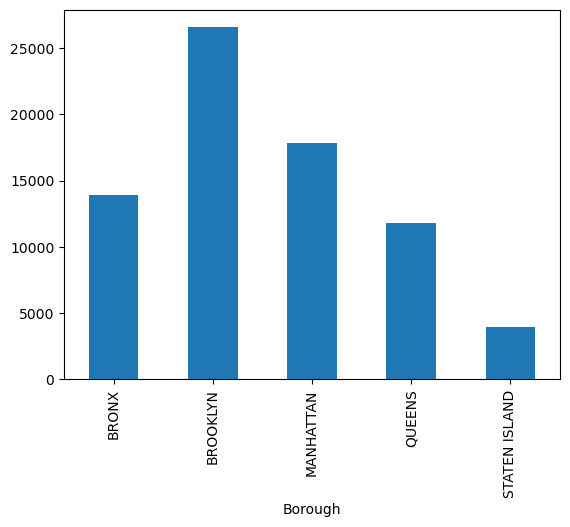

In [76]:
#bar graph of closures by borough
closed_df.plot(kind='bar')

In [77]:
#Do certain Boroughs have more rat sightings?
#a. Do certain Zip Codes have more rat sightsings?
rat_burroughs=clean_rats_df[clean_rats_df['Complaint Type']=='Rodent'].groupby('ZIPCODE').size()
rat_burroughs

ZIPCODE
-1         336
 83         21
 1123        1
 10000       3
 10001     383
          ... 
 11691     214
 11692      76
 11693      65
 11694      72
 100354      1
Length: 192, dtype: int64

In [64]:
zip_sort=clean_rats_df.groupby("Incident Zip")


In [65]:
merged_df=pd.merge(clean_grade_df,clean_rats_df, on='Date')



In [66]:
zip_merge=pd.merge(clean_grade_df,clean_rats_df, on='ZIPCODE')

In [ ]:
#clean_rats_df.columns


,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,Date,CollapsedCUISINES
3,Manhattan,10036,American,2015-09-24,P,2015-09-24,American
245,Queens,11368,American,2016-09-02,C,2016-09-02,American
247,Queens,11368,American,2016-09-02,C,2016-09-02,American
248,Queens,11368,American,2016-09-02,C,2016-09-02,American
287,Brooklyn,11206,Spanish,2016-09-23,B,2016-09-23,European
...,...,...,...,...,...,...,...
1356,Manhattan,10026,American,2017-11-27,B,2017-11-27,American
1357,Manhattan,10026,American,2017-11-27,B,2017-11-27,American
1358,Manhattan,10026,American,2017-11-27,B,2017-11-27,American
1359,Manhattan,10026,American,2017-11-27,B,2017-11-27,American


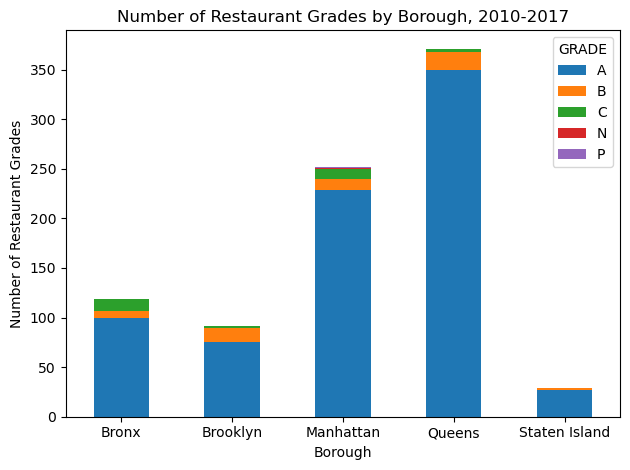

In [67]:
gradecounts= clean_grade_df.groupby(['BORO', 'GRADE']).size().reset_index(name='count')

Boroughs = gradecounts['BORO']
counts = gradecounts['count']
grades = gradecounts['GRADE']

transposecounts = gradecounts.pivot(index='BORO', columns='GRADE', values='count').fillna(0)

transposecounts.plot(kind='bar', stacked=True)
plt.xlabel('Borough')
plt.ylabel('Number of Restaurant Grades')
plt.title('Number of Restaurant Grades by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [68]:
clean_grade_df

,BORO,DBA,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,GRADE,Date
3,Manhattan,Stage 42,10036,American,2015-09-24,P,2015-09-24
5,Manhattan,Stage 42,10036,American,2015-10-14,A,2015-10-14
6,Manhattan,Stage 42,10036,American,2015-10-14,A,2015-10-14
8,Manhattan,AMERICAN AIRLINES THEATER,10036,American,2015-11-19,A,2015-11-19
9,Manhattan,AMERICAN AIRLINES THEATER,10036,American,2015-11-19,A,2015-11-19
...,...,...,...,...,...,...,...
1393,Queens,CB CHARISMA BALLROOM,11367,Other,2017-12-18,A,2017-12-18
1396,Queens,CB CHARISMA BALLROOM,11367,Other,2017-12-18,A,2017-12-18
1403,Queens,UNDERGROUND LOUNGE,11419,Caribbean,2017-12-21,A,2017-12-21
1409,Queens,UNDERGROUND LOUNGE,11419,Caribbean,2017-12-21,A,2017-12-21


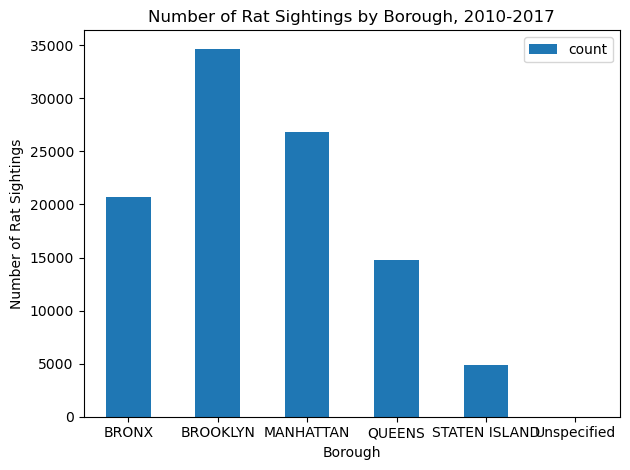

In [69]:
ratcounting=  clean_rats_df.groupby(['Borough']).size().reset_index(name='count')

#ratboroughs = ratcounting['Borough']
#ratcounts = ratcounting.groupby('Borough').count()['Complaint Type']


#rattransposecounts = ratcounting.pivot(index='Borough', columns=ratboroughs, values=ratcounts).fillna(0)

ratcounting.plot(kind='bar', x='Borough', y='count')
plt.xlabel('Borough')
plt.ylabel('Number of Rat Sightings')
plt.title('Number of Rat Sightings by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

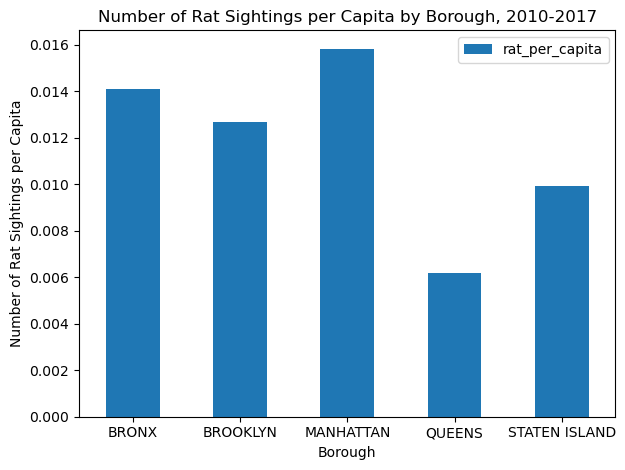

In [71]:
#consider per capita data. Find population and divide the rat sightings by the number of people.
ratcounting = clean_rats_df.groupby(['Borough']).size().reset_index(name='count')

# Your population data
borough_pops = pd.DataFrame({'Borough': ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
                             'Population': [1471160, 2736074, 1694251, 2405464, 495747]})

# Merge rat sightings data with population data
ratcounting = ratcounting.merge(borough_pops, on='Borough')

# Calculate rat sightings per capita
ratcounting['rat_per_capita'] = ratcounting['count'] / ratcounting['Population']

# Plotting
ratcounting.plot(kind='bar', x='Borough', y='rat_per_capita')
plt.xlabel('Borough')
plt.ylabel('Number of Rat Sightings per Capita')
plt.title('Number of Rat Sightings per Capita by Borough, 2010-2017')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

In [ ]:
borough_pops=pd.Series([{'BRONX':1471160},
                {'BROOKLYN':2736074},
                {'MANHATTAN':1694251},
                {'QUEENS':2405464},
                {'STATEN ISLAND':495747}])
borough_pops

SyntaxError: invalid syntax (366860513.py, line 5)

In [ ]:
dict_lis=[{'BRONX':1471160},
                {'BROOKLYN':2736074},
                {'MANHATTAN':1694251},
                {'QUEENS':2405464},
                {'STATEN ISLAND':495747}]

In [ ]:
[dict_lis]

In [ ]:
borough_count=clean_rats_df['Borough'].value_counts()
borough_count.pop('Unspecified')

In [ ]:
borough_count['BROOKLYN']